# Transformation

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [55]:
a = np.array([1,2,3,4,5])
a_standardaized = (a - a.mean())/a.std()
print(a_standardaized)

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


In [56]:
print(a_standardaized.mean())
print(a_standardaized.std())

0.0
0.9999999999999999


In [57]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [58]:
x, y = iris.data, iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_test.shape)

(30, 4)


### import

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### fit ( )

In [67]:
scaler.fit(x_train)

StandardScaler()

### transform ( )

In [61]:
x_train_scaled = scaler.transform(x_train)

In [62]:
print('mean: %s'%x_train_scaled.mean(axis=0))
print('standard diviation: %s' %x_train_scaled.std(axis=0))

mean: [ 3.28163422e-15  3.16413562e-15 -1.18423789e-16  1.53580852e-16]
standard diviation: [1. 1. 1. 1.]


In [63]:
x_test_scaled = scaler.transform(x_test)

In [64]:
print('mean: %s'%x_test_scaled.mean(axis=0))
print('standard diviation: %s' %x_test_scaled.std(axis=0))

mean: [-0.32528133 -0.18003432 -0.09272586 -0.11266607]
standard diviation: [0.90990521 0.86757534 0.96483988 0.93089555]


# PCA

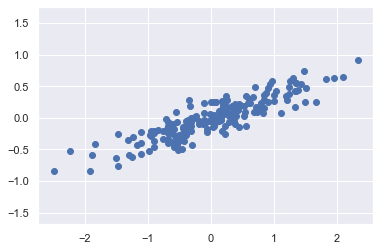

In [70]:
np.random.seed(1)
x = np.dot(np.random.random(size=(2,2)), np.random.normal(size=(2,200))).T
plt.plot(x[:, 0], x[:, 1], 'o')
plt.axis('equal');

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [72]:
v1 = pca.components_[:,0]
v2 = pca.components_[:,1]
print(v1)
print(v2)

[-0.94446029 -0.32862557]
[-0.32862557  0.94446029]


In [73]:
print(np.dot(v1, v2))

0.0


In [75]:
print(np.linalg.norm(v1))
print(np.linalg.norm(v2))

1.0
1.0


In [77]:
clf = PCA(0.95)
x_trans = clf.fit_transform(x)
print(x.shape)
print(x_trans.shape)

(200, 2)
(200, 1)


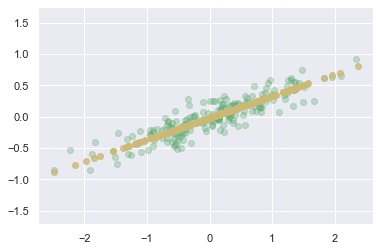

In [96]:
x_new = clf.inverse_transform(x_trans)
plt.plot(x[:, 0], x[:,1], 'go', alpha=0.3)
plt.plot(x_new[:,0], x_new[:,1], 'yo', alpha=0.8
        
        )
plt.axis('equal');


# PCA for Digits 

In [99]:
from sklearn.datasets import load_digits
digits = load_digits()
x, y = digits.data, digits.target
print(x.shape)

(1797, 64)


In [101]:
pca = PCA(n_components=2)
x_proj = pca.fit_transform(x)
print(x_proj.shape)

(1797, 2)


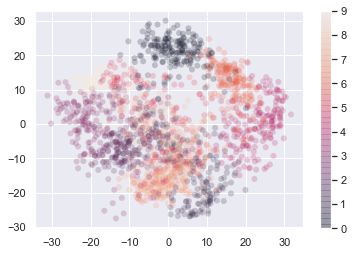

In [110]:
plt.scatter(x_proj[:,0], x_proj[:,1], alpha=0.2, c=y, edgecolors='none')
plt.colorbar();

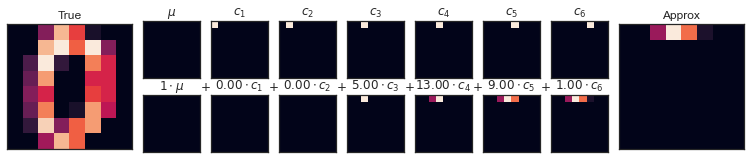

In [116]:
from figs5.figures import plot_image_components
sns.set_style('white')
plot_image_components(digits.data[0])

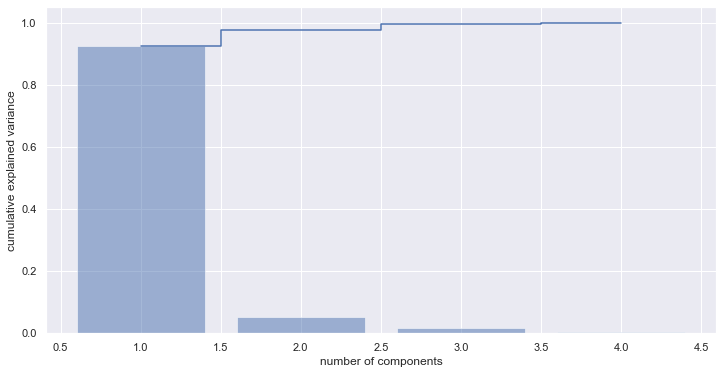

In [126]:
sns.set()
plt.figure(figsize=(12, 6))

pca = PCA().fit(x)  # Notice

plt.bar(range(1, len(pca.explained_variance_ratio_) + 1),
        pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')

plt.step(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         where='mid')

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

<html>
<body>
<h1 style="background-color:powderblue;">EXERCISE:</h1>
<p style="background-color:powderblue;">Visualize the iris dataset using the first two principal components, and compare this visualization to using two of the original features.</p>
</body>
</html>

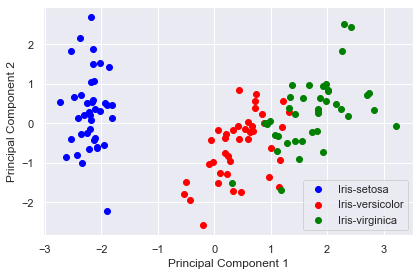

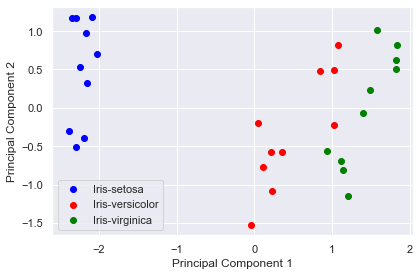

In [133]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0,
                                                    stratify=iris.target)


#using scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

#using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(sc.transform(x_train))
x_test_pca = pca.transform(sc.transform(x_test))


for x, y in zip((x_train_pca, x_test_pca), (y_train, y_test)):

    for i, annot in enumerate(zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                                  ('blue', 'red', 'green'))):
        plt.scatter(x[y==i, 0],
                    x[y==i, 1],
                    label=annot[0],
                    c=annot[1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

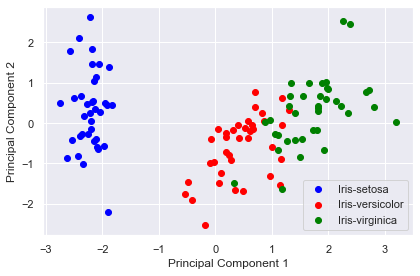

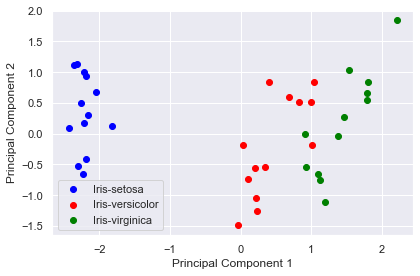

In [132]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=0,
                                                    stratify=iris.target)

sc = StandardScaler()
sc.fit(X_train)
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(sc.transform(X_train))
X_test_pca = pca.transform(sc.transform(X_test))

for X, y in zip((X_train_pca, X_test_pca), (y_train, y_test)):

    for i, annot in enumerate(zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                                  ('blue', 'red', 'green'))):
        plt.scatter(X[y==i, 0],
                    X[y==i, 1],
                    label=annot[0],
                    c=annot[1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()